In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/iris.csv')

In [2]:
# Separate features and target
X = df.drop('species', axis=1)
y = df['species']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Finding optimal k value...


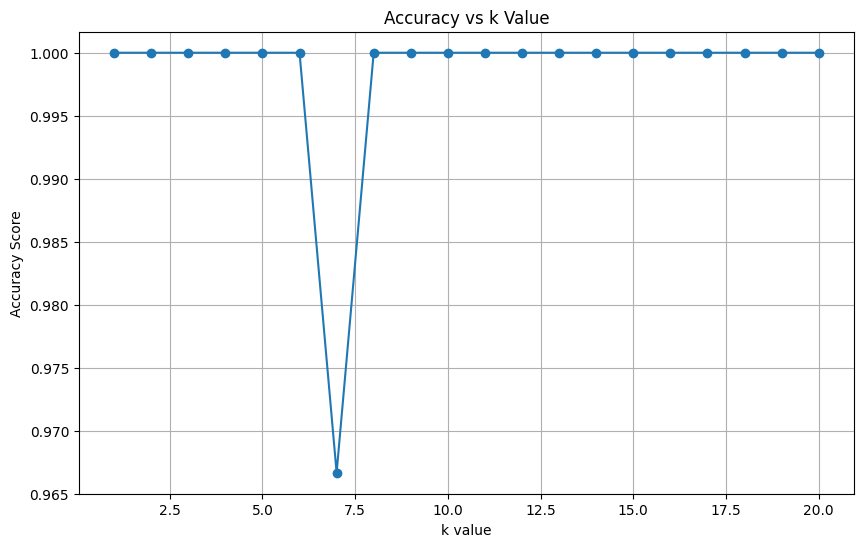

Best k value: 1


In [3]:
# Function to find the best k value
def find_best_k(X_train, X_test, y_train, y_test, max_k=20):
    scores = []
    k_values = range(1, max_k+1)

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        score = knn.score(X_test, y_test)
        scores.append(score)

    # Plot k values vs accuracy scores
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, scores, marker='o')
    plt.xlabel('k value')
    plt.ylabel('Accuracy Score')
    plt.title('Accuracy vs k Value')
    plt.grid(True)
    plt.show()

    best_k = k_values[np.argmax(scores)]
    return best_k

# Find the best k value
print("Finding optimal k value...")
best_k = find_best_k(X_train, X_test, y_train, y_test)
print(f"Best k value: {best_k}")

In [4]:
# Create and train the KNN classifier with the best k value
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)



Accuracy Score: 1.0000


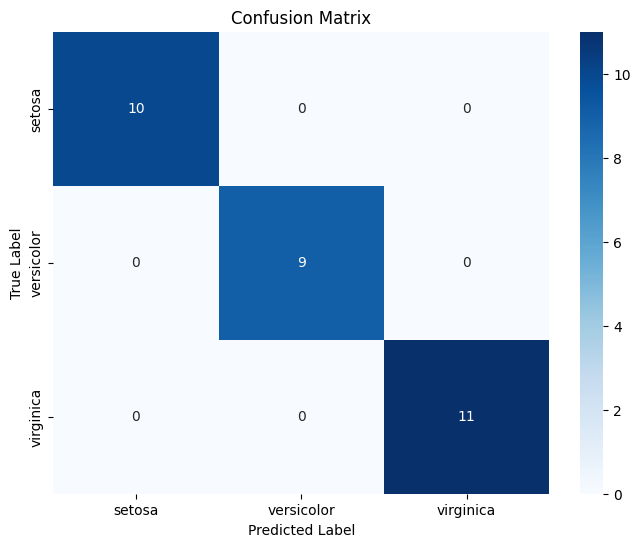


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Model Score on Test Data: 1.0000


In [5]:
# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score: {accuracy:.4f}")

# Generate and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=df['species'].unique(),
           yticklabels=df['species'].unique())
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print model score on test data
test_score = knn.score(X_test, y_test)
print(f"Model Score on Test Data: {test_score:.4f}")